In [42]:
import datetime
from datetime import date

import numpy as np
import pandas as pd
import pandas_datareader.data as web

'''pandas_datareader.data module is a part of the pandas_datareader library,
     which is used for retrieving financial and economic data from various online sources.
'''
import seaborn as sns
from matplotlib import pyplot as plt


import yfinance as yfin
yfin.pdr_override()

#'''overrides all the other data sources no need to specify the source'''

## Pulling Data

In [43]:
start= datetime.date.today()-datetime.timedelta(days=5*365)
end=datetime.date.today()

#timedelta is used to specify the duration of time

In [44]:
df= web.DataReader(["TCS.NS","LT.NS","ICICIBANK.NS"],start,end)["Adj Close"]
df

[*********************100%***********************]  3 of 3 completed


,ICICIBANK.NS,LT.NS,TCS.NS
Date,,,
2018-07-06,262.237549,1155.811401,1718.145386
2018-07-09,263.354309,1175.617920,1691.245483
2018-07-10,265.490601,1172.514648,1684.150024
2018-07-11,260.975189,1163.524170,1778.277710
2018-07-12,264.422485,1186.342773,1770.598389
...,...,...,...
2023-06-27,936.099976,2388.050049,3197.350098
2023-06-29,936.099976,2388.050049,3197.350098
2023-06-30,934.599976,2475.550049,3302.250000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1232 entries, 2018-07-06 to 2023-07-04
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ICICIBANK.NS  1232 non-null   float64
 1   LT.NS         1232 non-null   float64
 2   TCS.NS        1232 non-null   float64
dtypes: float64(3)
memory usage: 38.5 KB


In [46]:
df.describe()

,ICICIBANK.NS,LT.NS,TCS.NS
count,1232.000000,1232.000000,1232.000000
mean,580.392161,1473.425573,2618.892534
std,207.789442,411.041274,678.385897
min,251.749985,672.131897,1538.805176
25%,382.394081,1216.143646,1930.216492
50%,537.714325,1367.959045,2808.876099
75%,748.980423,1783.152466,3217.958862
max,954.299988,2475.550049,3857.104248


## Price Chart & Return Calculation

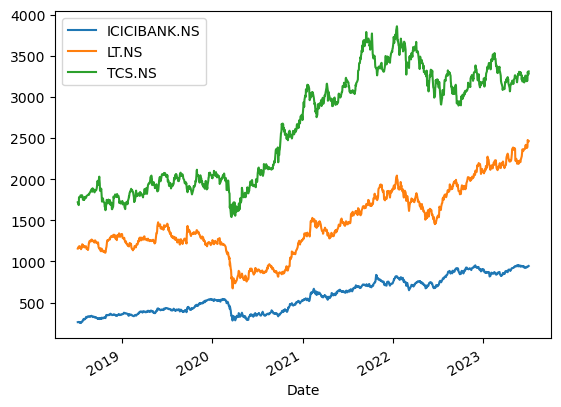

In [47]:
df.plot();

In [48]:
##Return Calculation

df["ICICIBANK"]=np.log(df["ICICIBANK.NS"])-np.log(df["ICICIBANK.NS"].shift(1))
df["LT"]=np.log(df["LT.NS"])-np.log(df["LT.NS"].shift(1))
df["TCS"]=np.log(df["TCS.NS"])-np.log(df["TCS.NS"].shift(1))


#.shift()  gives the value at the previous day

#Advantage of log return is that they are additive in nature

In [49]:
ret= df.iloc[1:,3:]

#removing the first row because the return can;t be calculated for this and keeping only return columns

In [50]:
ret.describe()

,ICICIBANK,LT,TCS
count,1231.000000,1231.000000,1231.000000
mean,0.001041,0.000614,0.000532
std,0.021535,0.017978,0.016021
min,-0.196597,-0.177522,-0.098830
25%,-0.009547,-0.008581,-0.007429
50%,0.000813,0.000276,0.000636
75%,0.011208,0.009444,0.008889
max,0.128942,0.090162,0.093901


In [51]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1231 entries, 2018-07-09 to 2023-07-04
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ICICIBANK  1231 non-null   float64
 1   LT         1231 non-null   float64
 2   TCS        1231 non-null   float64
dtypes: float64(3)
memory usage: 38.5 KB


In [52]:
#Calculating Annual return

((ret.mean()+1).pow(365)-1)*100

ICICIBANK    46.200753
LT           25.122512
TCS          21.441886
dtype: float64

## Volatility

In [53]:
band= df.max()-df.min()
band

ICICIBANK.NS     702.550003
LT.NS           1803.418152
TCS.NS          2318.299072
ICICIBANK          0.325539
LT                 0.267685
TCS                0.192731
dtype: float64

In [54]:
currYear= df.loc[date.today()-datetime.timedelta(365):date.today()]
currYear.max()-currYear.min()


# .loc label based indexing like in this case date
#.iloc integer based indexing like in previous case of log return

ICICIBANK.NS    239.141602
LT.NS           939.076050
TCS.NS          638.006836
ICICIBANK         0.081656
LT                0.099412
TCS               0.082514
dtype: float64

## Moving Avergae

<AxesSubplot:xlabel='Date', ylabel='ICICIBANK.NS'>

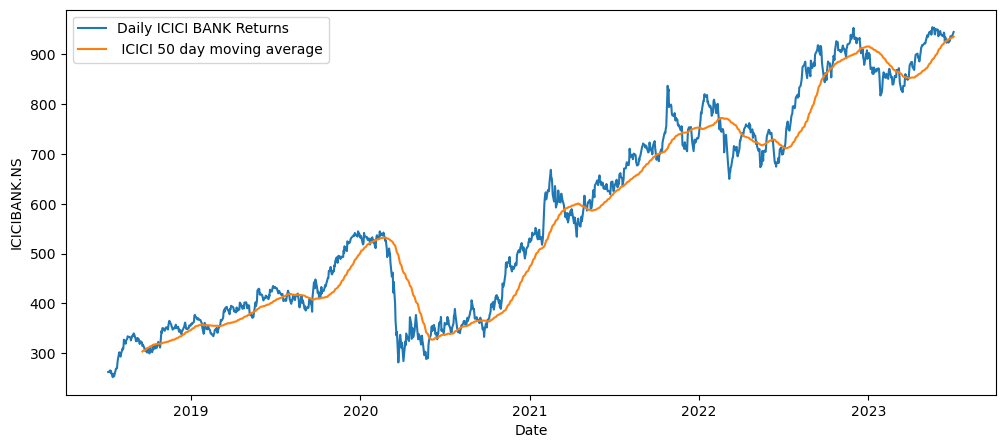

In [59]:
# 50 day moving average

df["ICICI_50_day"]=df["ICICIBANK.NS"].rolling(50).mean()

plt.figure(figsize=(12,5))

sns.lineplot(
    x="Date",y="ICICIBANK.NS", data=df, label= "Daily ICICI BANK Returns"
)

sns.lineplot(
    x="Date", y="ICICI_50_day", data= df, label=" ICICI 50 day moving average"
)

.rolling(50): Creates a rolling window of size 50. This means that for each element in the "ICICIBANK.NS" column, it considers the current value along with the preceding 49 values to calculate the rolling mean.

Creates 49 empty enteries

In [61]:
# 50 day Rolling distance
#Distance between 50 day rolling average and that they price

((abs(df.iloc[:,:3]-df.iloc[:,:3].rolling(50).mean()))/df.iloc[:,:3]).mean()

ICICIBANK.NS    0.059894
LT.NS           0.060858
TCS.NS          0.042389
dtype: float64

In [60]:
df.iloc[:,:3]

,ICICIBANK.NS,LT.NS,TCS.NS
Date,,,
2018-07-06,262.237549,1155.811401,1718.145386
2018-07-09,263.354309,1175.617920,1691.245483
2018-07-10,265.490601,1172.514648,1684.150024
2018-07-11,260.975189,1163.524170,1778.277710
2018-07-12,264.422485,1186.342773,1770.598389
...,...,...,...
2023-06-27,936.099976,2388.050049,3197.350098
2023-06-29,936.099976,2388.050049,3197.350098
2023-06-30,934.599976,2475.550049,3302.250000


## Combined Funciton for all of the above

In [ ]:
def investCompare(starttime,endtime,tickers):
    
    #pull data
    prices= web.DataReader(list(tickers.keys()),starttime,endtime)["Adj Close"]
    prices=prices.rename(columns=tickers)
    
    #return
    ret= np.log(prices)-np.log(prices.shift(1))
    ret= ret.iloc[1:,:]
    
    #analysing last year data
    currYear= prices.loc[
        date.today()-datetime.timedelta(365):date.today()
    ]
    highlow= (currYear.max()-currYear.min())/prices.iloc[-1]
    highlow= pd.DataFrame(highlow,columns="HighminusLow")
    
    #Moving Average Volatility
    Ma=pd.Data